Initialize functions

In [8]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

Define components for the genetic algorithm

In [9]:
import math
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

def normalise(pos):
    len = math.sqrt(pos[0]**2+pos[1]**2)
    return tuple(a / len for a in pos)

def scale(pos, s):
    return (x*s for x in pos)

def translate(pos1, pos2):
    return  tuple(map(sum, zip(pos1, pos2)))

def random_vector(d):
    return tuple(np.random.normal() for i in range(d))

def gen_neignbour(origin, step):
    direction = normalise(random_vector(2))
    direction_scaled = [x * step for x in direction]
    return translate(origin, direction_scaled)

def gen_neignbours(origin, step, neigh_size):
    return tuple(gen_neignbour(origin, step) for each in range(neigh_size))

Plot the fitness plane

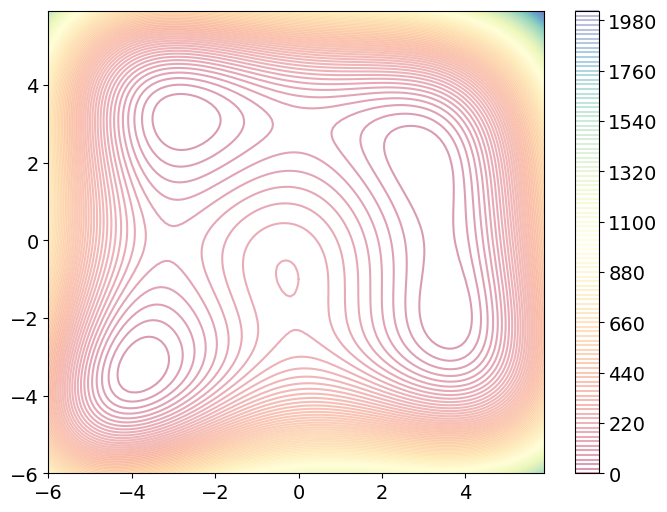

In [104]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
font = {'size'   : 14}
matplotlib.rc('font', **font)

def himmelblau(x:float, y:float)-> float:
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

def plot_fitness_plane():
    X = np.arange(-6, 6, 0.1)
    Y = np.arange(-6, 6, 0.1)
    X, Y = np.meshgrid(X, Y)
    Z = himmelblau(X, Y)

    plt.figure(figsize=(8, 6))
    cs = plt.contour(X, Y, Z, levels=100, cmap='Spectral',
                    norm=colors.Normalize(vmin=Z.min(), vmax=Z.max()), alpha=0.4)
    plt.colorbar(cs)

plot_fitness_plane()
plt.show()

In [11]:
T = 50

T = 10

In [173]:

from dp.accountant import PureExponential, BudgetCollection, BudgetCollection, PureBudget, Accountant, Algorithm
from math import exp

from typing import Sequence, Tuple, Callable
import random


def evaluate_lossless(s: Tuple[float, float])-> float:
    score = himmelblau(*s)
    return score

def select_lossless(ss: Sequence[Tuple[float, float]],)-> Tuple[float, float]:
    best_neighbour = min(ss, key=evaluate_lossless)
    return best_neighbour

def plot_fitness_by_selector(sel: Callable, episode_count: int, label="None"):
    global T
    
    episode_results = []
    episode_scores = []
    for x in range(episode_count):
        if isinstance(sel, Accountant):
            sel.reset()
        origin_x = random.random() * 6*2 - 6
        origin_y = random.random() * 6*2 - 6
        origin = (origin_x, origin_y)
        position = origin
        path = []
        
        for i in range(T):
            path.append(position)
            neighbours = gen_neignbours(position, 0.25, 10)
            position = sel(neighbours)
            if position is None:
                break
            

        episode_results.append(path)
        episode_scores.append([himmelblau(*x) for x in path])
        average_episode_scores = [x/episode_count for x in list(map (sum, list(zip(*episode_scores))))]
    plt.plot(average_episode_scores, label=label)

def plot_path_by_selector(sel: Callable):
    global T
    origin_x = random.random() * 6*2 - 6
    origin_y = random.random() * 6*2 - 6
    origin = (origin_x, origin_y)
    position = origin
    path = []
    
    for i in range(T):
        path.append(position)
        neighbours = gen_neignbours(position, 0.5, 10)
        position = sel(neighbours + (position,))
        if position is None:
            break

    plt.plot([x[0] for x in path], [x[1] for x in path], marker="o", label="path")
    plt.scatter(*(origin), s=[150], marker="o", label="origin", color="#1f77b4")
    plt.legend()


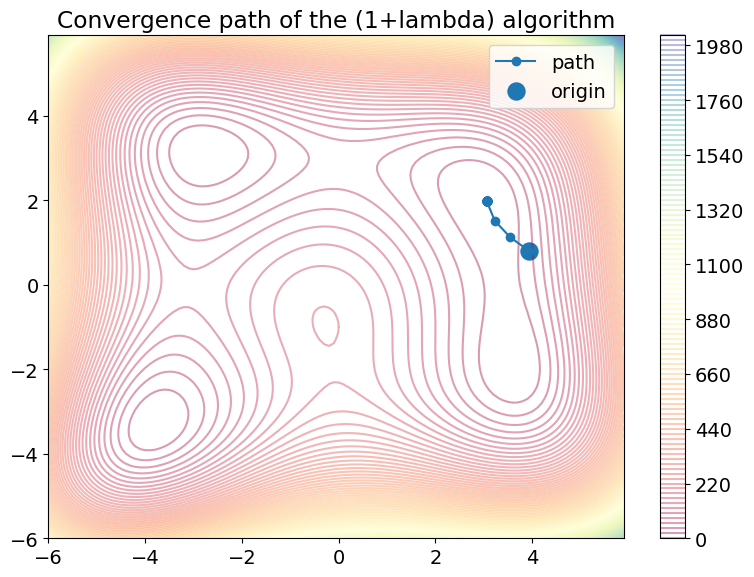

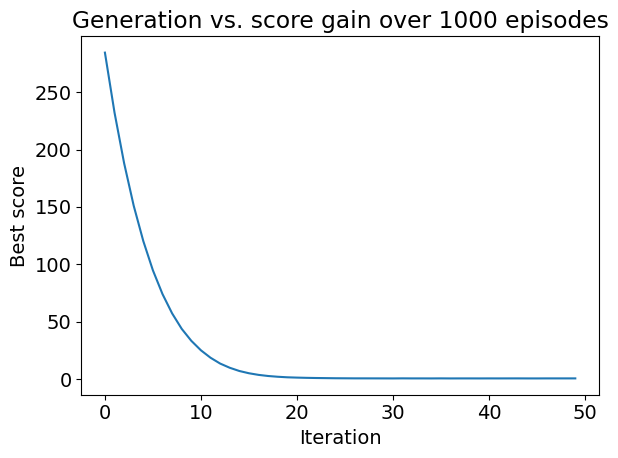

In [161]:

plot_fitness_plane()
plot_path_by_selector(select_lossless)
plt.title("Convergence path of the (1+lambda) algorithm")
plt.tight_layout()
plt.savefig("sccg.svg")
plt.show()

plt.title("Generation vs. score gain over 1000 episodes")
plt.xlabel("Iteration")
plt.ylabel("Best score")
plt.tight_layout()
plot_fitness_by_selector(select_lossless, 1000)

plt.savefig("love.svg")
plt.show()

overbudget, returning None


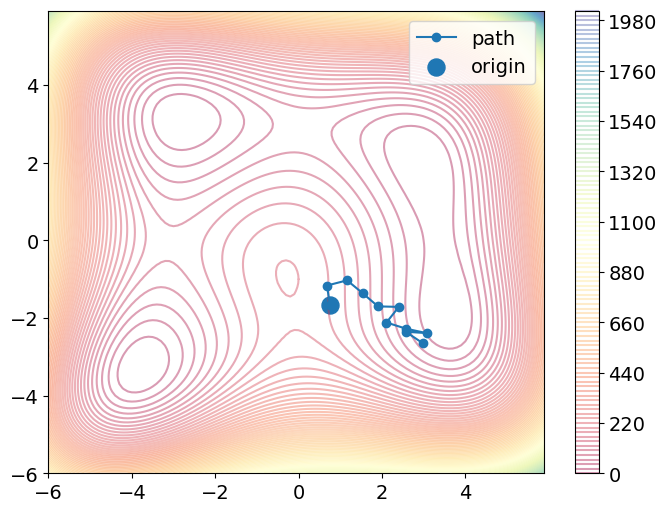

overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
o

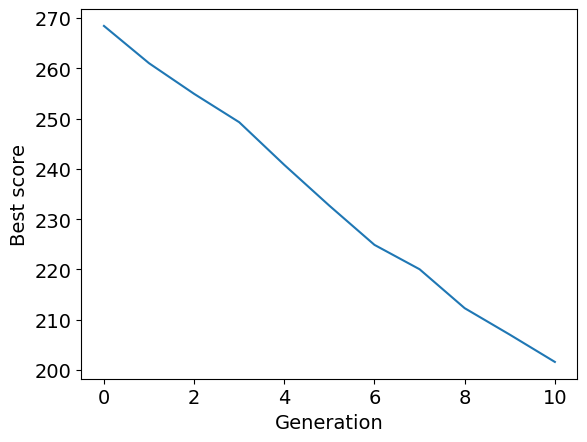

In [213]:
from typing import Set, Callable, TypeVar

def eta_comp(origin, target, comp):
    origin_score = comp(*origin)
    target_score = comp(*target)
    score_ratio = target_score > origin_score
    if (score_ratio<0) or (score_ratio>1):
        raise Exception("eta_comp: score ratio error")

    if target_score > origin_score:
        return 0
    else:
        return 1-score_ratio
    
E = TypeVar("E")

from random import choices
class ExponentialPointPicker(Algorithm[Sequence[E], E]):
    def __init__(self, epsilon: float):
        self._budgets: BudgetCollection = BudgetCollection([PureBudget(epsilon)])
        self.u_sensitivity = 1
        
    def validate_input(self, items: Sequence[E])-> bool:
        return True #what

    def validate_output(self, output: E)-> bool:
        return True # limitation of the framework, validate_output cannot access input

    def __call__(self, input: Sequence[E])-> E:
        ## Assume that the last item is the origin
        origin = input[-1]
        
        weights = tuple(exp(self.budgets["pure"]["epsilon"] * eta_comp(origin, x, himmelblau))
                        / (2 * self.u_sensitivity) for x in input)

        result: E = choices(input, weights, k=1)[0]
        return result if result is not None else input[-1]
    @property
    def budgets(self)-> BudgetCollection:
        return self._budgets

expn = ExponentialPointPicker(1)
expn_accounted = Accountant(expn, BudgetCollection([PureBudget(10)]))

plot_fitness_plane()
plot_path_by_selector(expn_accounted)
plt.show()

plot_fitness_by_selector(expn_accounted, 1000, label="Exponential")




plt.xlabel("Generation")
plt.ylabel("Best score")
plt.savefig("superbo.svg")
plt.show()


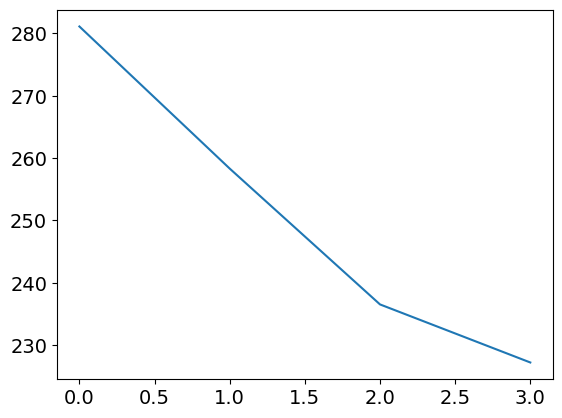

In [164]:
from numpy.random import laplace

def fitness_by_2d_laplace(episode_count, epsilon, budget):
    episode_results = []
    episode_scores = []
    

    for x in range(episode_count):
        origin_x = random.random() * 6 * 2 - 6
        origin_y = random.random() * 6 * 2 - 6
        origin = (origin_x, origin_y)
        position = origin
        path = []
        max_budget = budget
        used_budget = 0
        
        for i in range(T):
            used_budget += 2 * epsilon

            if max_budget <= used_budget:
                break
            path.append(position)
            neighbours = gen_neignbours(position, 0.25, 10)
            
            position = select_lossless(neighbours + (position,))

            position = (laplace(position[0], (0.25)/epsilon), laplace(position[0], (0.25)/epsilon))

        episode_results.append(path)
        episode_scores.append([himmelblau(*x) for x in path])
        average_episode_scores = [x/episode_count for x in list(map (sum, list(zip(*episode_scores))))]
    plt.plot(average_episode_scores)

fitness_by_2d_laplace(1000, 1, 10)
plt.show()

1 20
2 20
3 20
4 20
5 20
6 20
7 20
8 20
9 20
10 20
11 20
12 20
13 20
14 20
15 20
16 20
17 20
18 20
19 20
20 20
19
1 20
2 20
3 20
4 20
5 20
6 20
7 20
8 20
9 20
10 20
11 20
12 20
13 20
14 20
15 20
16 20
17 20
18 20
19 20
20 20
19
1 20
2 20
3 20
4 20
5 20
6 20
7 20
8 20
9 20
10 20
11 20
12 20
13 20
14 20
15 20
16 20
17 20
18 20
19 20
20 20
19
1 20
2 20
3 20
4 20
5 20
6 20
7 20
8 20
9 20
10 20
11 20
12 20
13 20
14 20
15 20
16 20
17 20
18 20
19 20
20 20
19
1 20
2 20
3 20
4 20
5 20
6 20
7 20
8 20
9 20
10 20
11 20
12 20
13 20
14 20
15 20
16 20
17 20
18 20
19 20
20 20
19
1 20
2 20
3 20
4 20
5 20
6 20
7 20
8 20
9 20
10 20
11 20
12 20
13 20
14 20
15 20
16 20
17 20
18 20
19 20
20 20
19
1 20
2 20
3 20
4 20
5 20
6 20
7 20
8 20
9 20
10 20
11 20
12 20
13 20
14 20
15 20
16 20
17 20
18 20
19 20
20 20
19
1 20
2 20
3 20
4 20
5 20
6 20
7 20
8 20
9 20
10 20
11 20
12 20
13 20
14 20
15 20
16 20
17 20
18 20
19 20
20 20
19
1 20
2 20
3 20
4 20
5 20
6 20
7 20
8 20
9 20
10 20
11 20
12 20
13 20
14 20
15 20
16 20
1

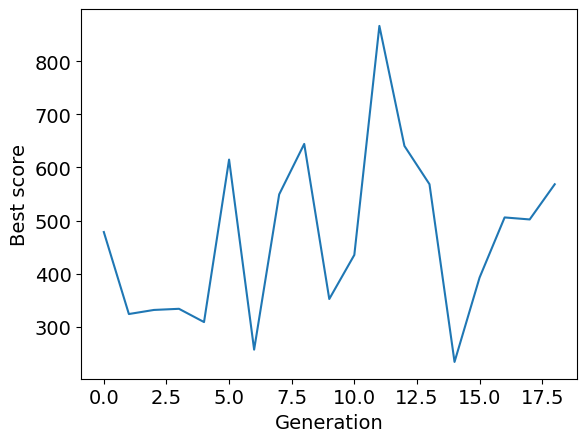

In [218]:
from numpy.random import laplace

def fitness_by_2d_laplace(episode_count, epsilon, budget, label):
    episode_results = []
    episode_scores = []
    
    truncate = False

    for x in range(episode_count):
        origin_x = random.random() * 6 * 2 - 6
        origin_y = random.random() * 6 * 2 - 6
        origin = (origin_x, origin_y)
        position = origin
        
        path = []
        max_budget = budget
        used_budget = 0
        
        for i in range(90):
            used_budget += epsilon
            print (used_budget, max_budget)
            if max_budget <= used_budget:
                break
            path.append(position)
            neighbours = gen_neignbours(position, 0.25, 10)
            old_position = position
            position = select_lossless(neighbours + (position,))

            position = (laplace(position[0], (1) / epsilon), laplace(position[0], (1) /epsilon))
            position = (min(max(position[0], -6), 6), min(max(position[1], -6), 6))
        episode_results.append(path)
        episode_scores.append([himmelblau(*x) for x in path])
        
        average_episode_scores = [x/episode_count for x in list(map (sum, list(zip(*episode_scores))))]
        print(len(average_episode_scores))
    plt.plot(average_episode_scores, label=label)
    

fitness_by_2d_laplace(10, 1, 20, label="a")

plt.xlabel("Generation")
plt.ylabel("Best score")
plt.savefig("lapl.svg")
plt.show()

overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
overbudget, returning None
o

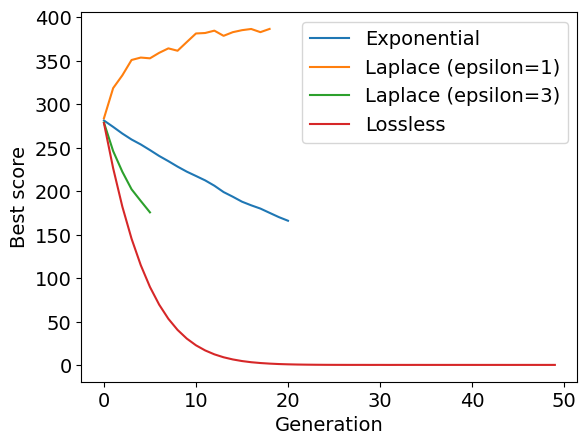

In [226]:
expn_2 = ExponentialPointPicker(1)
expn_accounted_20 = Accountant(expn_2, BudgetCollection([PureBudget(20)]))
plot_fitness_by_selector(expn_accounted_20, 5000, label="Exponential")
fitness_by_2d_laplace(5000, 1, 20, label="Laplace (epsilon=1)")
fitness_by_2d_laplace(5000, 3, 20, label="Laplace (epsilon=3)")
plot_fitness_by_selector(select_lossless, 5000, label="Lossless")

plt.xlabel("Generation")
plt.ylabel("Best score")
plt.legend()
plt.savefig("total.svg")
plt.show()